# Лабораторная работа по теме: "Решение задач Классического машинного обучения"

## Импорт библиотек

In [50]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression


## Получаем данные

In [51]:
path = os.getcwd()
df = pd.read_csv(f'{path}/data/diabetes.csv')
df.head()

In [53]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Часть 1. Метод ближайших соседей. Обучение и результаты

In [55]:
klist = [5, 10, 15, 20, 25]
scores = []
models = []
for k in klist:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    models.append(model)
    
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f'Score of KNN with k={k}: {score:.4f}')
    scores.append(score)

Score of KNN with k=5: 0.6562
Score of KNN with k=10: 0.7188
Score of KNN with k=15: 0.7396
Score of KNN with k=20: 0.7083
Score of KNN with k=25: 0.7031


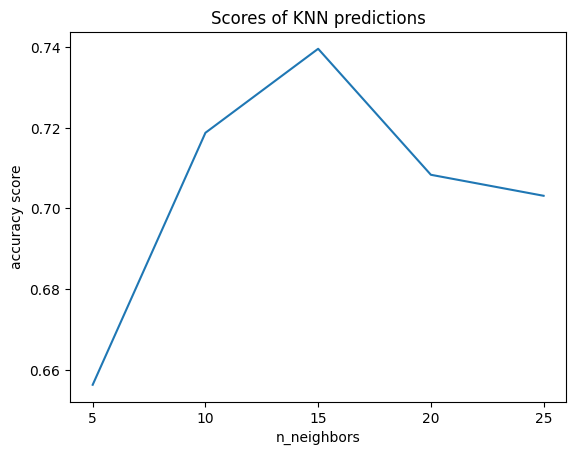

In [56]:
fig, ax = plt.subplots()
ax.plot(klist, scores)
ax.set_title('Scores of KNN predictions')
ax.set_xticks(klist)
ax.set_xlabel('n_neighbors')
ax.set_ylabel('accuracy score')
plt.show()

<p>Лучший скор обучения при значениях k=15</p>

## Часть 2. Множественная линейная регрессия. Обучение и результаты

In [58]:
X_reg = df[["SkinThickness", "BMI"]]
y_reg = df["Insulin"]

In [59]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.25, random_state=42)

In [60]:
linear_reg = LinearRegression()
linear_reg.fit(X_reg_train, y_reg_train)
y_reg_pred = linear_reg.predict(X_reg_test)
r2_score(y_reg_test, y_reg_pred)

0.23559635152317926

In [61]:
linear_reg.intercept_, linear_reg.coef_

(5.491427254467197, array([3.1072424 , 0.34985975]))

Скор обучения по метрике R^2 = 0.235, коэффициенты формулы линейной регрессии: b = 5.49, a1 = 3.1, a2 = 0.35

## Часть 3. Решающее дерево, обучение и результаты.

In [73]:
max_depth_params = [3, 5, 7, 9, 15, 25]
tree_scores = [] 
for max_depth in max_depth_params:
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    tree_model.fit(X_train, y_train)
    y_pred = tree_model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"Accuracy score of Decision Tree with max_depth={max_depth}: {score:.4f}")
    tree_scores.append(score)

Accuracy score of Decision Tree with max_depth=3: 0.7135416666666666
Accuracy score of Decision Tree with max_depth=5: 0.7239583333333334
Accuracy score of Decision Tree with max_depth=7: 0.7083333333333334
Accuracy score of Decision Tree with max_depth=9: 0.6979166666666666
Accuracy score of Decision Tree with max_depth=15: 0.7083333333333334
Accuracy score of Decision Tree with max_depth=25: 0.7083333333333334


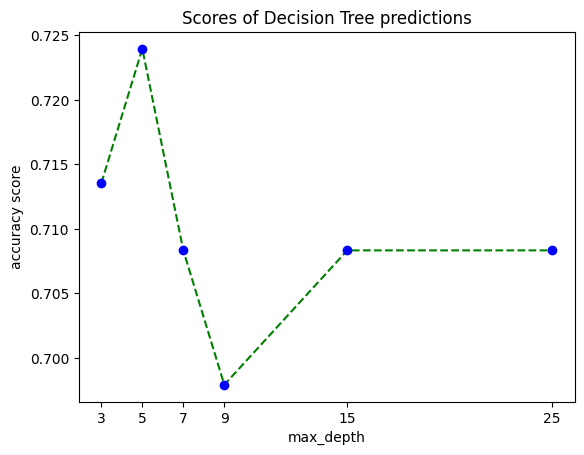

In [83]:
fig, ax = plt.subplots()
ax.plot(max_depth_params, tree_scores, marker="o", ls="--", color="green", mec="b", mfc="b")
ax.set_title('Scores of Decision Tree predictions')
ax.set_xticks(max_depth_params)
ax.set_xlabel('max_depth')
ax.set_ylabel('accuracy score')
plt.show()

Лучшая оценка при глубине = 5. После модель переобучается.